# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

Nazwa zespołu: IAD12
Członkowie: Izabela Karczewska 409957, Natalia Kołodziejczyk 409695, Natalia Kubańska 411933

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import random as rnd

### Wczytanie danych

Poniższy kod wczytuje do zmiennej `eruptions_data` dane z przygotowanego wcześniej pliku eruptions_data.pkl.
Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_pickle("eruption_data.pkl")
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


In [4]:
# Wczytanie ramek z poprzednich zajęć 
vei_data_1 = pd.read_pickle("vei_data_1.pkl")
vei_data_2 = pd.read_pickle("vei_data_2.pkl")
vei_data_3 = pd.read_pickle("vei_data_3.pkl")

### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [5]:
column1=["All eruptions", "Confirmed Eruptions", "Uncertain Eruptions"]
column2=["f", "cf", "rf", "crf"]
vei_data=pd.DataFrame(columns=pd.MultiIndex.from_product([column1, column2]), index=sorted(eruptions_data["VEI"].unique().astype('int32')))
vei_data.index.name="VEI"
vei_data["All eruptions"]=vei_data_1
vei_data["Confirmed Eruptions"]=vei_data_2
vei_data["Uncertain Eruptions"]=vei_data_3
vei_data
vei_data.style.format({('All eruptions', 'rf'):'{:.4f}', ('Confirmed Eruptions', 'rf'):'{:.4f}', ('Uncertain Eruptions', 'rf'):'{:.4f}', 
                       ('All eruptions', 'crf'):'{:.4f}',('Confirmed Eruptions', 'crf'):'{:.4f}', ('Uncertain Eruptions', 'crf'):'{:.4f}',
                       ('All eruptions', 'f'):'{:.0f}', ('Confirmed Eruptions', 'f'):'{:.0f}', ('Uncertain Eruptions', 'f'):'{:.0f}', 
                       ('All eruptions', 'cf'):'{:.0f}',('Confirmed Eruptions', 'cf'):'{:.0f}', ('Uncertain Eruptions', 'cf'):'{:.0f}' 
                      
                      
                      })

In [6]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

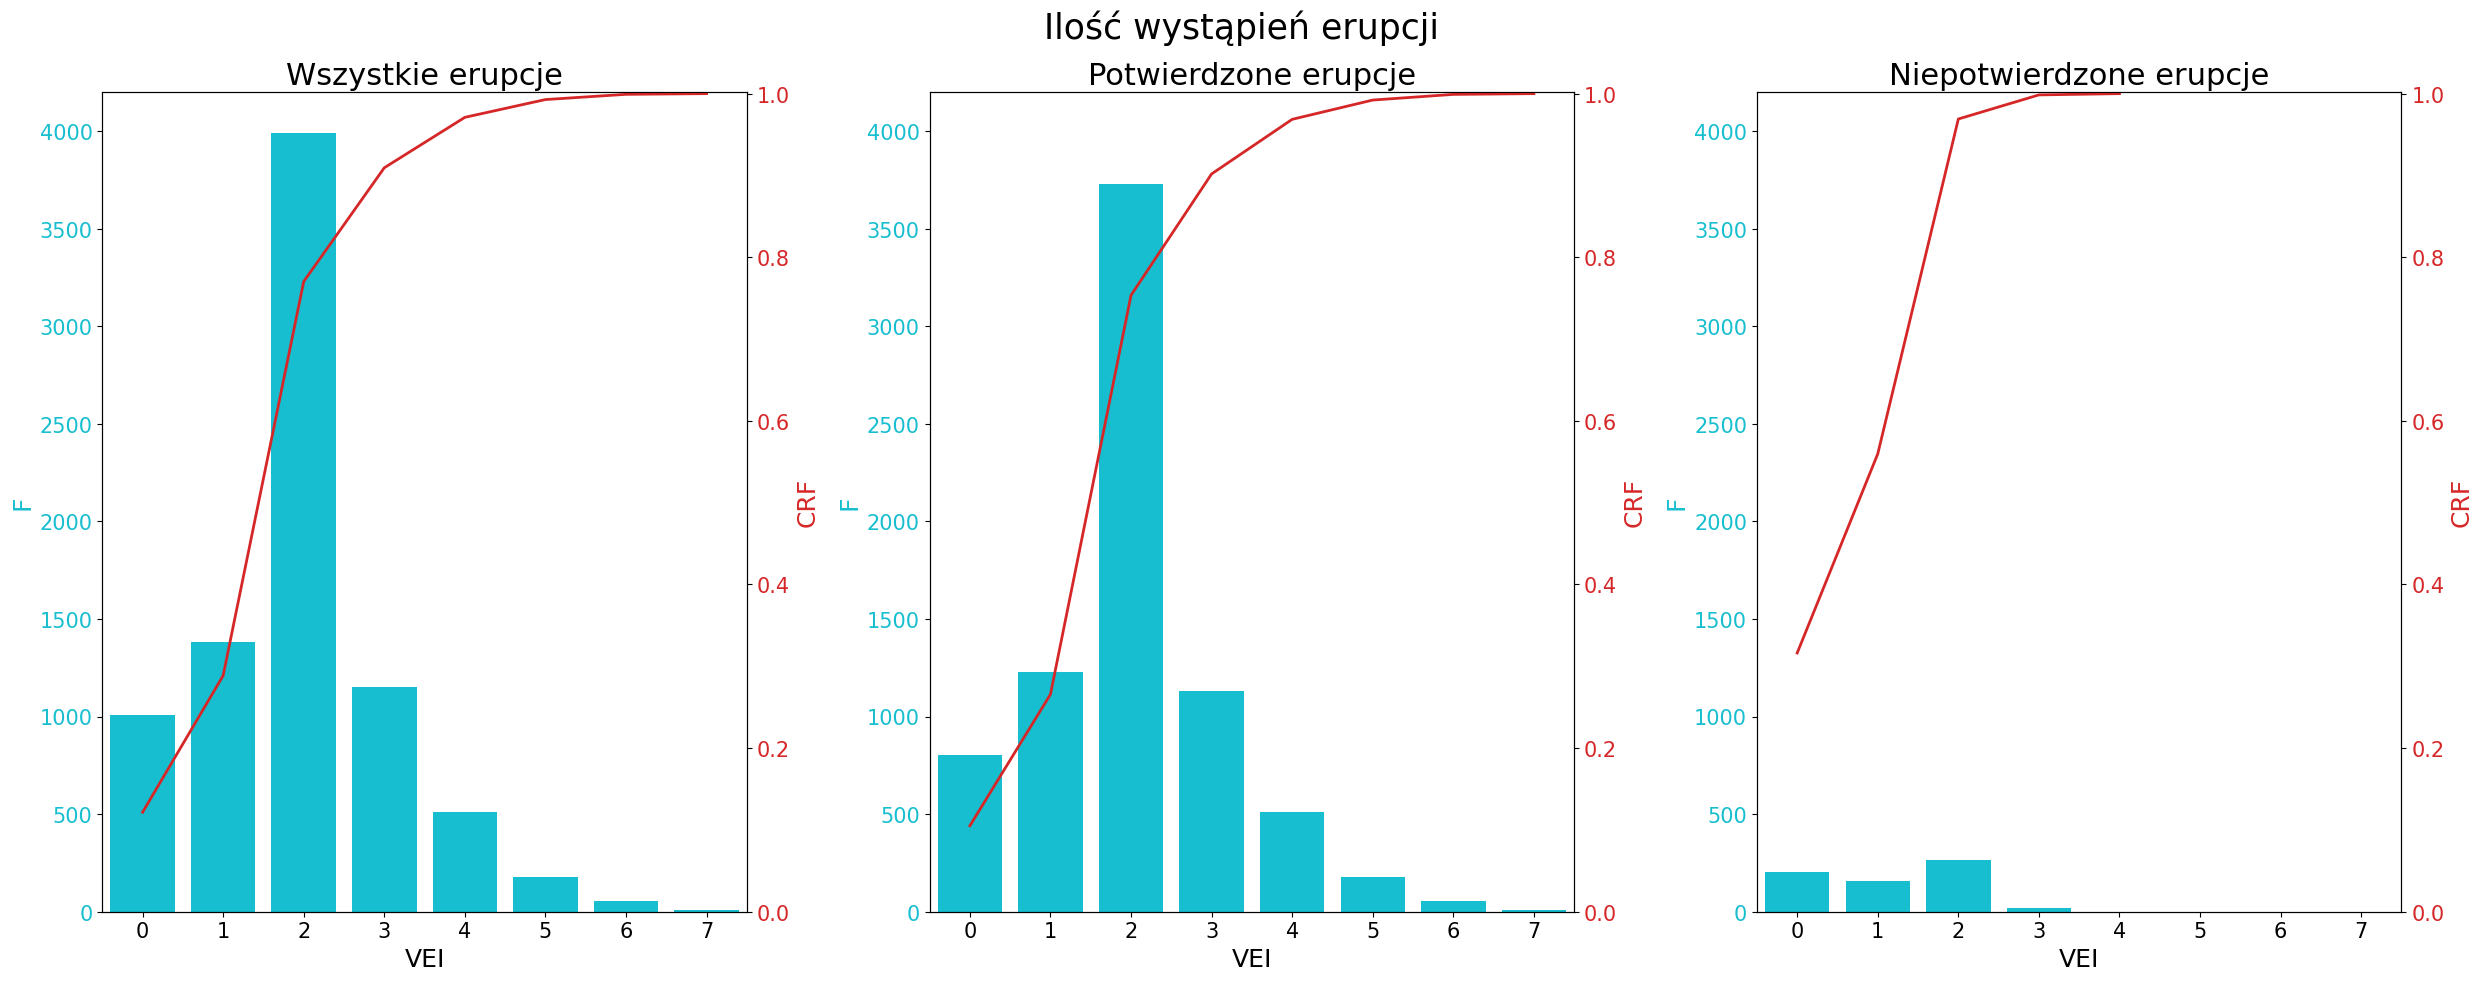

In [7]:
fig, ax = plt.subplots(1,3, figsize = (25,10))
colorf = 'tab:cyan'
colorcf = 'tab:red'

ax1 = ax[0].twinx()
ax[0].bar(vei_data['All eruptions'].index, vei_data['All eruptions']['f'], color = colorf) 
ax1.plot(vei_data['All eruptions'].index, vei_data['All eruptions']['crf'], color = colorcf, lw = 2)
ax[0].set_xlabel('VEI', fontsize = 18)
ax[0].set_ylabel('F', color = colorf, fontsize = 18)
ax1.set_ylabel('CRF', color = colorcf, fontsize = 18)
ax1.tick_params(labelcolor = colorcf, labelsize = 15)
ax[0].tick_params(axis = 'y', labelcolor = colorf)
ax[0].tick_params(labelsize=15)
ax[0].set_title('Wszystkie erupcje',  fontsize = 22)
ax[0].set_ylim(0,4200)
ax[0].set_xlim(-0.5,7.5)
ax1.set_ylim(0,1.002)


ax2 = ax[1].twinx()
ax[1].bar(vei_data['Confirmed Eruptions'].index, vei_data['Confirmed Eruptions']['f'], color = colorf) 
ax2.plot(vei_data['Confirmed Eruptions'].index, vei_data['Confirmed Eruptions']['crf'], color = colorcf, lw = 2)
ax2.tick_params(axis = 'y', labelcolor = colorcf, labelsize = 15)
ax[1].set_xlabel('VEI', fontsize = 18)
ax[1].set_ylabel('F', color = colorf, fontsize = 18)
ax2.set_ylabel('CRF', color = colorcf, fontsize = 18)
ax[1].tick_params(axis = 'y', labelcolor = colorf)
ax[1].tick_params(labelsize=15)
ax[1].set_title('Potwierdzone erupcje', fontsize = 22)
ax[1].set_ylim(0,4200)
ax[1].set_xlim(-0.5,7.5)
ax2.set_ylim(0,1.002)



ax3 = ax[2].twinx()
ax[2].bar(vei_data['Uncertain Eruptions'].index,vei_data['Uncertain Eruptions']['f'], color = colorf) 
ax3.plot(vei_data['Uncertain Eruptions'].index, vei_data['Uncertain Eruptions']['crf'], color = colorcf, lw = 2)
ax[2].set_xlabel('VEI', fontsize = 18)
ax[2].set_ylabel('F', color = colorf, fontsize = 18)
ax3.set_ylabel('CRF', color = colorcf, fontsize = 18)
ax3.tick_params(labelcolor = colorcf, labelsize=15)
ax[2].tick_params(axis = 'y', labelcolor = colorf)
ax[2].tick_params(labelsize=15)
ax[2].set_title('Niepotwierdzone erupcje', fontsize = 22)
ax[2].set_ylim(0,4200)
ax[2].set_xlim(-0.5,7.5)
ax3.set_ylim(0,1.002)


fig.suptitle('Ilość wystąpień erupcji', fontsize = 25)
fig.tight_layout(pad = 1.3)


### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

> Indeks: 2-poziomowe nagłówki </br>

>> Nagłówki 1 poziomu: Kategorie dowodów </br>

>> Nagłówki 2 poziomu: Metody, które dostarczyły dowodów </br>

> Kolumny: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [8]:
evidence_data= eruptions_data.pivot_table(index=['Evidence Type', "Evidence Method"], values="Volcano Name", columns="VEI", aggfunc="count").fillna(0)
evidence_data = evidence_data.rename(columns=lambda x:int(x))
evidence_data["All"] = evidence_data.sum(axis=1)
evidence_data.style.format(precision=0)

In [9]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuban\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0.5, 0.94, 'Wizualizacje rozkładu zarejestrowanych erupcji w czasie')

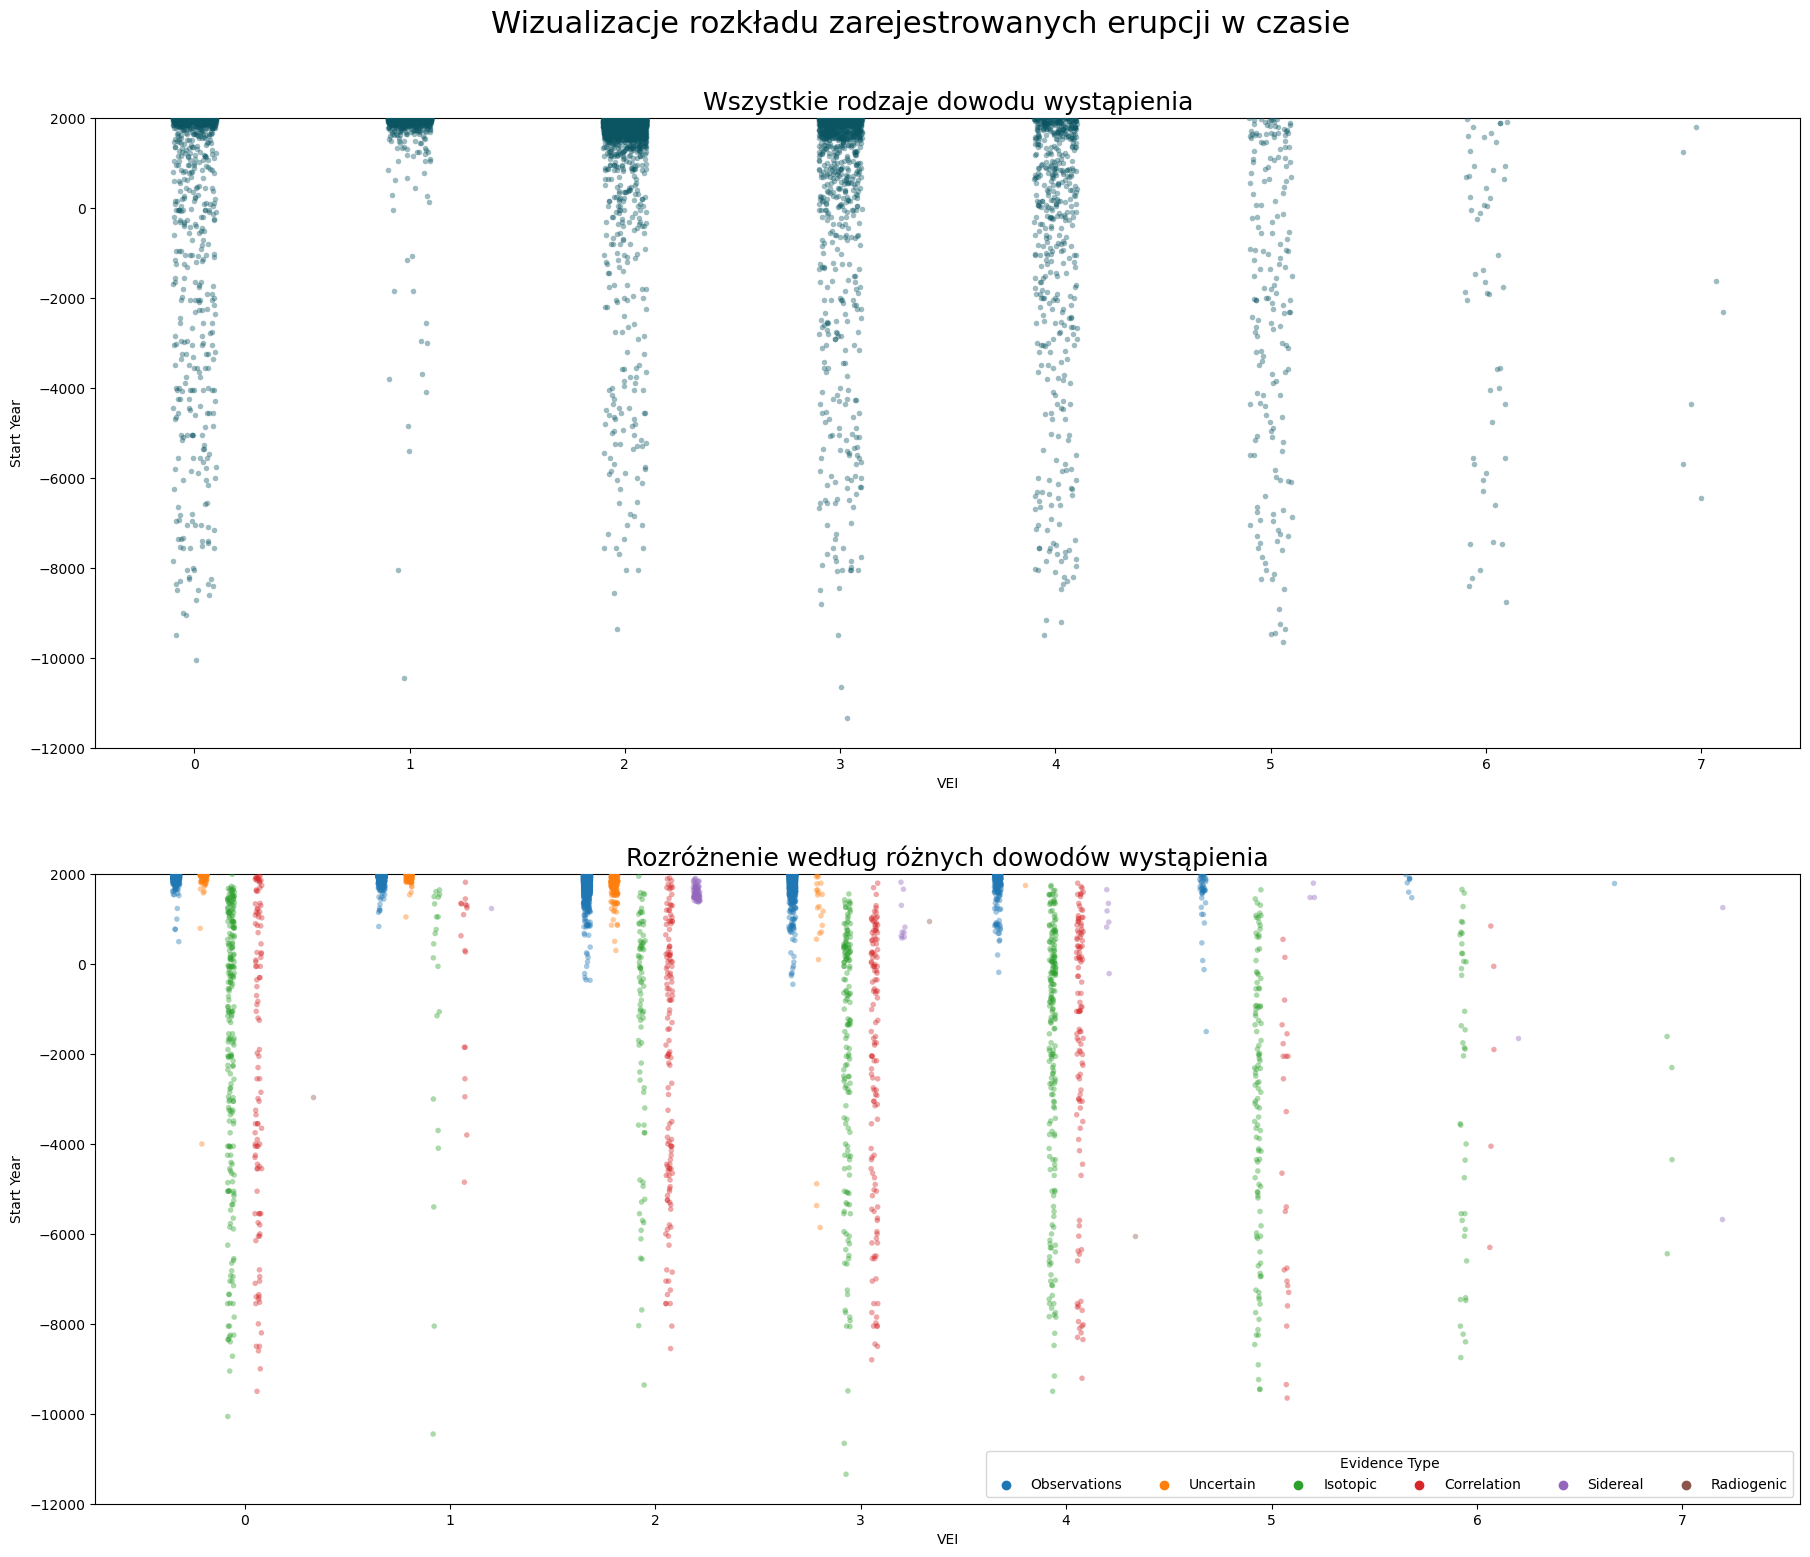

In [10]:
fig, ax = plt.subplots(2,1, figsize = (22,18))

sns.stripplot(eruptions_data, y = "Start Year", x = "VEI", ax = ax[0], alpha = 0.4, size = 4, color = "#0B5563", native_scale = True)
ax[0].set_title('Wszystkie rodzaje dowodu wystąpienia', fontsize = '18')
ax[0].set_ylim(-12000, 2010)

sns.stripplot(eruptions_data, y = "Start Year", x = "VEI", ax = ax[1], hue = "Evidence Type", dodge = True, alpha = 0.4, size = 4, native_scale = True)
ax[1].set_title('Rozróżnenie według różnych dowodów wystąpienia', fontsize = '18')
ax[1].legend(loc="lower right", ncol=len(eruptions_data.columns), title='Evidence Type')
ax[1].set_ylim(-12000, 2010)

fig.suptitle('Wizualizacje rozkładu zarejestrowanych erupcji w czasie', fontsize = '22', y = 0.94)